## Credit Project (Deep Learning)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
import urllib.request
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
filename = "german.csv"
urllib.request.urlretrieve(url, filename)


('german.csv', <http.client.HTTPMessage at 0x282616c6550>)

### Data backround
The data we are working with is the German Credit dataset, which contains information about credit applicants in Germany. The dataset includes 20 categorical and numeric features such as the applicant's age, credit history, employment status, and purpose of the loan. The dataset was originally sourced from the UCI Machine Learning Repository and has been preprocessed into a CSV file format. We downloaded the dataset from the repository and saved it as "german.csv".

In [3]:
# Set the display options for pandas dataframes
pd.set_option('display.max_columns', None) # Display all columns
pd.set_option('display.max_rows', None) # Display all rows
pd.set_option('display.width', None) # Automatically adjust the column width
pd.set_option('display.max_colwidth', None) # Display full contents of each column

# Load the dataset from the "german.csv" file
data = pd.read_csv('german.csv', header=None)

# Display the first few rows of the DataFrame
display(data.head())


,0
0,A11 6 A34 A43 1169 A65 A75 4 A93 A101 4 A121 67 A143 A152 2 A173 1 A192 A201 1
1,A12 48 A32 A43 5951 A61 A73 2 A92 A101 2 A121 22 A143 A152 1 A173 1 A191 A201 2
2,A14 12 A34 A46 2096 A61 A74 2 A93 A101 3 A121 49 A143 A152 1 A172 2 A191 A201 1
3,A11 42 A32 A42 7882 A61 A74 2 A93 A103 4 A122 45 A143 A153 1 A173 2 A191 A201 1
4,A11 24 A33 A40 4870 A61 A73 3 A93 A101 4 A124 53 A143 A153 2 A173 2 A191 A201 2


### Notes on initial loading:

The above code sets the display options for pandas dataframes, loads the German credit dataset from a file called "german.csv", and displays the first few rows of the dataframe. However, since the data was loaded without column names, we will need to assign column names to the dataframe later in the analysis. This is done below.

In [4]:
import pandas as pd

# Define the column names
column_names = [
    "checking_account_status",
    "duration",
    "credit_history",
    "purpose",
    "credit_amount",
    "savings_account_status",
    "employment",
    "installment_rate",
    "personal_status",
    "other_debtors",
    "residence_since",
    "property",
    "age",
    "other_installment_plans",
    "housing",
    "number_credits",
    "job",
    "dependents",
    "telephone",
    "foreign_worker",
    "class"
]

# Load the dataset from the "german.csv" file and set the column names
data = pd.read_csv('german.csv', sep=' ', header=None, names=column_names)



# Display the first few rows of the DataFrame
data.head()


,checking_account_status,duration,credit_history,purpose,credit_amount,savings_account_status,employment,installment_rate,personal_status,other_debtors,residence_since,property,age,other_installment_plans,housing,number_credits,job,dependents,telephone,foreign_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


### Explaining the header

The header represents the column names of the dataset. Here's how to read the column names:


- **checking_account_status**: Status of the existing checking account


- **duration**: Duration in months


- **credit_history**: Credit history, where A30 means no credit taken/all credits paid back duly, A31 means all credits at this bank paid back duly, A32 means existing credits paid back duly till now, A33 means delay in paying off in the past, A34 means critical account/other credits existing (not at this bank)


- **purpose**: Purpose of the credit, where A40 means car (new), A41 means car (used), A42 means furniture/equipment, A43 means radio/television, A44 means domestic appliances, A45 means repairs, A46 means education, A47 means vacation, A48 means retraining, A49 means business, A410 means others


- **credit_amount**: Credit amount


- **savings_account_status**: Status of savings account/bonds, where A61 means less than 100 DM, A62 means 100 <= ... < 500 DM, A63 means 500 <= ... < 1000 DM, A64 means 1000 <= ... < 5000 DM, A65 means >= 5000 DM
- employment: Present employment since, where A71 means unemployed, A72 means < 1 year, A73 means 1 <= ... < 4 years, A74 means 4 <= ... < 7 years, A75 means >= 7 years


- **installment_rate**: Installment rate in percentage of disposable income


- **personal_status**: Personal status and sex, where A91 means male:divorced/separated, A92 means female:divorced/separated/married, A93 means male:single, A94 means male:married/widowed, A95 means female:single


- **other_debtors**: Other debtors/guarantors, where A101 means none, A102 means co-applicant, A103 means guarantor


- **residence_since**: Present residence since (in years)


- **property**: Property, where A121 means real estate, A122 means if not A121 : building society savings agreement/life insurance, A123 means if not A121/A122 : car or other, A124 means unknown/no property


- **age**: Age in years


- **other_installment_plans**: Other installment plans, where A141 means bank, A142 means stores, A143 means none


- **housing**: Housing, where A151 means rent, A152 means own, A153 means for free


- **number_credits**: Number of existing credits at this bank


- **job**: Job, where A171 means unemployed/unskilled - non-resident, A172 means unskilled - resident, A173 means skilled employee/official, A174 means management/self-employed/highly qualified employee/officer
- dependents: Number of people being liable to provide maintenance for


- **telephone**: Telephone, where A191 means none, A192 means yes, registered under the customers name


- **foreign_worker**: Foreign worker, where A201 means yes, A202 means no


- **class**: Credit classification, where 1 means good, and 0 means bad


In [5]:
# 1. Data preprocessing
# a. Check for missing values
print(data.isnull().sum())




checking_account_status    0
duration                   0
credit_history             0
purpose                    0
credit_amount              0
savings_account_status     0
employment                 0
installment_rate           0
personal_status            0
other_debtors              0
residence_since            0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
dependents                 0
telephone                  0
foreign_worker             0
class                      0
dtype: int64


In [6]:
# b. Encode categorical features
data = pd.get_dummies(data, columns=[
    "checking_account_status",
    "credit_history",
    "purpose",
    "savings_account_status",
    "employment",
    "personal_status",
    "other_debtors",
    "property",
    "other_installment_plans",
    "housing",
    "job",
    "telephone",
    "foreign_worker"
])



In [7]:
# c. Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = data.drop("class", axis=1)
y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# d. Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Deeplearning with TensorFlow

In [8]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load the data into a Pandas dataframe
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
df = pd.read_csv(url, header=None, sep=' ')

# Encode the categorical features as one-hot vectors
df = pd.get_dummies(df, columns=[0,2,3,5,6,8,9,11,13,14,16,18,19])

# Convert the labels to 0/1
df[20] = (df[20] == 2).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=20), df[20], test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the deep learning model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, callbacks=[early_stopping])

# Evaluate the model on the test data
y_pred = (model.predict(X_test) > 0.5).astype(int)
test_acc = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

print('Test accuracy:', test_acc)
print('Test precision:', test_precision)
print('Test recall:', test_recall)
print('Test F1-score:', test_f1)


C:\Users\josep\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\josep\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\josep\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Epoch 1/50
40/40 [==============================] - 2s 14ms/step - loss: 0.6449 - accuracy: 0.6313 - val_loss: 0.5712 - val_accuracy: 0.7063
Epoch 2/50
40/40 [==============================] - 0s 5ms/step - loss: 0.5566 - accuracy: 0.7047 - val_loss: 0.5374 - val_accuracy: 0.7000
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.5270 - accuracy: 0.7297 - val_loss: 0.5138 - val_accuracy: 0.7188
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4902 - accuracy: 0.7719 - val_loss: 0.5109 - val_accuracy: 0.7312
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4658 - accuracy: 0.7766 - val_loss: 0.5123 - val_accuracy: 0.7312
Epoch 6/50
40/40 [==============================] - 0s 4ms/step - loss: 0.4565 - accuracy: 0.7812 - val_loss: 0.5187 - val_accuracy: 0.7312
Epoch 7/50
40/40 [==============================] - 0s 4ms/step - loss: 0.4250 - accuracy: 0.8047 - val_loss: 0.5159 - val_accuracy: 0.7312
Epoch 8/50
40/40 [=

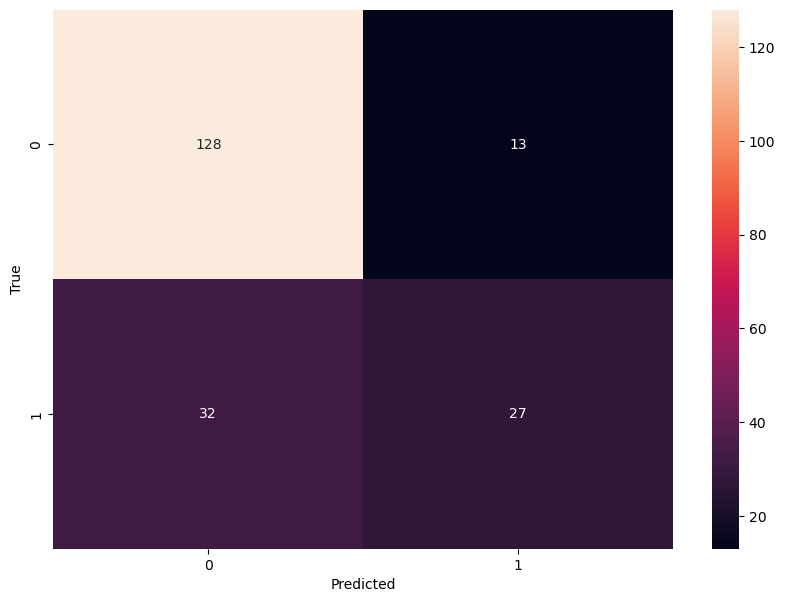

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
